In [1]:
# Cell 1 – Imports and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("..")
from src.data_loader import load_and_preprocess_data
from src.model_trainer import train_model

sns.set(style="whitegrid")

In [2]:
# Cell 2 – Load Data and Train Model
# Load and train using the latest pipeline
X_train, X_test, y_train, y_test = load_and_preprocess_data()
model = train_model(X_train, y_train)

# Convert X_test (numpy) to DataFrame for manipulation
feature_names = [f"feature_{i}" for i in range(X_test.shape[1])]
X_test_df = pd.DataFrame(X_test, columns=feature_names)

c:\Users\eren_\OneDrive\Desktop\secureML-audit-framework\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Cell 3 – Inversion Simulation Setup
# Assume attacker has one sample and varies a feature to probe model

# Select one real sample
base_sample = X_test_df.iloc[0].copy()

# Replicate sample 50 times
base_sample_df = pd.DataFrame([base_sample.values] * 50, columns=feature_names)

# Let's assume the attacker knows feature_2 correlates with 'credit_amount'
# Simulate variation of that feature from low to high
base_sample_df["feature_2"] = np.linspace(-2.0, 3.0, 50)  # Adjust range as needed

# Predict probabilities
probs = model.predict_proba(base_sample_df)[:, 1]


c:\Users\eren_\OneDrive\Desktop\secureML-audit-framework\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


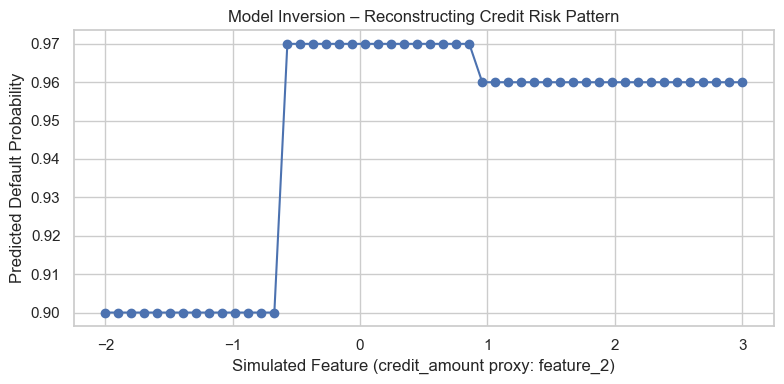

In [4]:
# Cell 4 – Visualization of Inversion
plt.figure(figsize=(8, 4))
plt.plot(base_sample_df["feature_2"], probs, marker='o')
plt.xlabel("Simulated Feature (credit_amount proxy: feature_2)")
plt.ylabel("Predicted Default Probability")
plt.title("Model Inversion – Reconstructing Credit Risk Pattern")
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ Conclusion

This simulation illustrates a model inversion attack: an adversary varies one input feature and observes output probabilities to infer sensitive relationships.

This is especially dangerous in:
- Financial scoring APIs (credit worthiness)
- Healthcare models (diagnostic predictions)

*Mitigation strategies* include:
- Differential privacy
- Confidence clipping
- Avoiding exposure of probability scores